In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os
import random

In [2]:
# # Seed value (can actually be different for each attribution step)
# seed_value= 12

# # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
# os.environ['PYTHONHASHSEED']=str(seed_value)

# # 2. Set `python` built-in pseudo-random generator at a fixed value
# random.seed(seed_value)

# # 3. Set `numpy` pseudo-random generator at a fixed value
# np.random.seed(seed_value)

# # 4. Set `tensorflow` pseudo-random generator at a fixed value
# tf.set_random_seed(seed_value)

# # 5. Configure a new global `tensorflow` session
# # from keras import backend as K
# # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# # K.set_session(sess)

AttributeError: module 'tensorflow' has no attribute 'set_random_seed'

In [2]:
dataXY = np.load('data.npz')
data = dataXY['data']
label = dataXY['label']
dataXY.close()

In [3]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
label_vec = label_encoder.fit_transform(label)
ylabel = to_categorical(label_vec)

In [4]:
label_encoder.classes_

array(['Z19', 'Z22', 'Z46', 'Z50', 'Z61', 'Zadj', 'Znf'], dtype='<U4')

In [5]:
print (label[1023])
print (ylabel[1023])

Z19
[1. 0. 0. 0. 0. 0. 0.]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data,ylabel, shuffle=True, test_size=0.2)

In [7]:
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of x_train: (5600, 4001, 6)
Shape of y_train: (5600, 7)


In [8]:
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_test: (1400, 4001, 6)
Shape of y_test: (1400, 7)


In [21]:
np.savez('data_train.npz', data = x_train, label = y_train)

In [22]:
np.savez('data_test.npz', data = x_test, label = y_test)

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv1D(32, 3, activation='relu', padding='same', input_shape=[4001,6]),
    keras.layers.MaxPool1D(2),
    keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPool1D(2),
    keras.layers.Conv1D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv1D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPool1D(2),
    keras.layers.Conv1D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv1D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPool1D(2),
#     keras.layers.Conv1D(512, 3, activation='relu', padding='same'),
#     keras.layers.Conv1D(512, 3, activation='relu', padding='same'),
#     keras.layers.MaxPool1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(7,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4001, 32)          608       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2000, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2000, 64)          6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 2000, 64)          12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1000, 64)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 1000, 128)         2

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20,verbose=1, validation_split=0.2) 

Epoch 1/20
70/70 [==============================] - 49s 686ms/step - loss: 78.0426 - accuracy: 0.3708 - val_loss: 1.2141 - val_accuracy: 0.6402
Epoch 2/20
70/70 [==============================] - 49s 708ms/step - loss: 1.1020 - accuracy: 0.5842 - val_loss: 0.7634 - val_accuracy: 0.6920
Epoch 3/20
70/70 [==============================] - 50s 715ms/step - loss: 0.7340 - accuracy: 0.7167 - val_loss: 0.4483 - val_accuracy: 0.8205
Epoch 4/20
70/70 [==============================] - 53s 756ms/step - loss: 0.8053 - accuracy: 0.6875 - val_loss: 0.6552 - val_accuracy: 0.7116
Epoch 5/20
70/70 [==============================] - 53s 760ms/step - loss: 0.6361 - accuracy: 0.7504 - val_loss: 0.3879 - val_accuracy: 0.8616
Epoch 6/20
70/70 [==============================] - 51s 730ms/step - loss: 0.4684 - accuracy: 0.8246 - val_loss: 0.3377 - val_accuracy: 0.8652
Epoch 7/20
70/70 [==============================] - 51s 727ms/step - loss: 0.4129 - accuracy: 0.8451 - val_loss: 0.3399 - val_accuracy: 0.870

In [1]:
model.save('zone_CNN-j1-trial.h5')

NameError: name 'model' is not defined

In [2]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,)
plt.savefig('test7.png', bbox_inches='tight', dpi=1200)

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0,)
plt.savefig('test8.png', bbox_inches='tight', dpi=1200)

NameError: name 'history' is not defined

In [ ]:
lsize = 9
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=lsize)
plt.rc('ytick', labelsize=lsize)
plt.rc('axes', labelsize=lsize)
plt.rc('legend', fontsize=lsize)
pWidth = 6.0
pHeight = pWidth / 1.618
fig, ax = plt.subplots(1, 1, figsize=(pWidth, pHeight), constrained_layout=True)
lns1 = ax.plot(np.array(epochs)+1, acc, color='red', linestyle='dashed', label='Training accuracy')
lns2 = ax.plot(np.array(epochs)+1, val_acc, color='blue', linestyle='dotted', linewidth=2, label='Validation accuracy')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title ('Training and validation accuracy')
ax.set_ylabel ('Accuracy')
ax.set_xlabel ('Epochs')
xticks = [1,2.5,5,7.5,10,12.5,15,17.5,20]
ax.set_xticks(xticks)
ax.set_xlim(1,20)
ax.grid()
plt.savefig('accuracy.pdf', dpi=300)
plt.show()

NameError: name 'np' is not defined

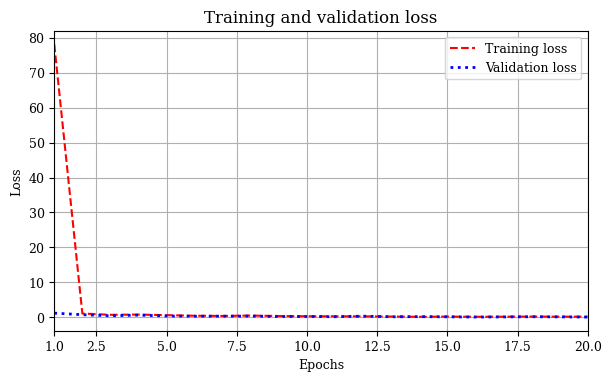

In [18]:
lsize = 9
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=lsize)
plt.rc('ytick', labelsize=lsize)
plt.rc('axes', labelsize=lsize)
plt.rc('legend', fontsize=lsize)
pWidth = 6.0
pHeight = pWidth / 1.618
fig, ax = plt.subplots(1, 1, figsize=(pWidth, pHeight), constrained_layout=True)
ln1 = ax.plot(np.array(epochs)+1, loss, color='red', linestyle='dashed', label='Training loss')
ln2 = ax.plot(np.array(epochs)+1, val_loss, color='blue', linestyle='dotted', linewidth=2, label='Validation loss')
ln = ln1+ln2
labs = [l.get_label() for l in ln]
ax.legend(ln, labs, loc=0)
ax.set_title ('Training and validation loss')
ax.set_ylabel ('Loss')
ax.set_xlabel ('Epochs')
xticks = [1,2.5,5,7.5,10,12.5,15,17.5,20]
ax.set_xticks(xticks)
ax.set_xlim(1,20)
ax.grid()
plt.savefig('loss.pdf', dpi=300)
plt.show()

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print ("Test Loss:", loss)
print ("Test Accuracy:", accuracy)

44/44 [==============================] - 4s 81ms/step - loss: 0.0788 - accuracy: 0.9679
Test Loss: 0.0787622407078743
Test Accuracy: 0.9678571224212646


44/44 [==============================] - 4s 79ms/step


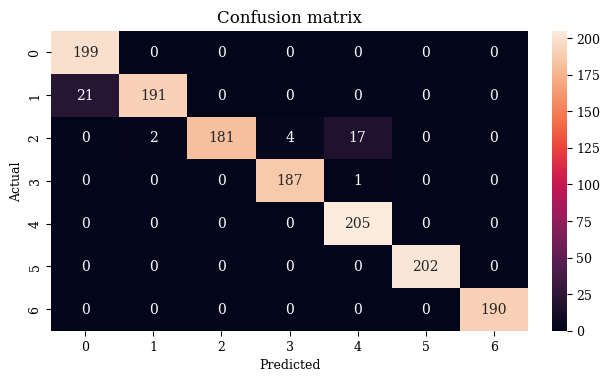

In [20]:
import seaborn
from sklearn.metrics import confusion_matrix
lsize = 9
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=lsize)
plt.rc('ytick', labelsize=lsize)
plt.rc('axes', labelsize=lsize)
plt.rc('legend', fontsize=lsize)
pWidth = 6.0
pHeight = pWidth / 1.618
fig, ax = plt.subplots(1, 1, figsize=(pWidth, pHeight), constrained_layout=True)
Y_pred = model.predict(x_test)
Y_pred1 = np.argmax(Y_pred, axis=1)
Y_test1 = np.argmax(y_test, axis=1)
cmat =  confusion_matrix(Y_test1,Y_pred1)
seaborn.heatmap(cmat, annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion.pdf', dpi=300)